##Import necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Intial choice based on interpretability
from sklearn.impute import SimpleImputer #handle missing values
from sklearn.preprocessing import StandardScaler #normal features(optional)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Or another suitable classifier
from sklearn.metrics import accuracy_score, classification_report


##Data Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the data, explicitly specifying the delimiter and handling errors
data=pd.read_csv('/content/drive/MyDrive/ct_rr.csv',low_memory=False) # Use 'on_bad_lines' to handle bad lines
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950


In [4]:
print(data)

                          ts number   pick_lat   pick_lng   drop_lat  \
0        2018-04-07 07:07:17  14626  12.313621  76.658195  12.287301   
1        2018-04-07 07:32:27  85490  12.943947  77.560745  12.954014   
2        2018-04-07 07:36:44  05408  12.899603  77.587300  12.934780   
3        2018-04-07 07:38:00  58940  12.918229  77.607544  12.968971   
4        2018-04-07 07:39:29  05408  12.899490  77.587270  12.934780   
...                      ...    ...        ...        ...        ...   
8381551  2019-04-07 23:55:24  50410  12.907856  77.557870  12.954270   
8381552  2019-04-07 23:58:15  12580  12.981010  77.694450  12.969070   
8381553  2019-04-07 22:11:20  72339  12.924252  77.650520  12.905820   
8381554  2019-04-07 22:12:30  72339  12.924252  77.650520  12.905820   
8381555  2019-04-07 15:00:55  28043  12.901222  77.594890  12.908599   

          drop_lng  
0        76.602280  
1        77.543770  
2        77.569950  
3        77.636375  
4        77.569950  
...      

In [5]:
data.shape

(8381556, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8381556 entries, 0 to 8381555
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   ts        object 
 1   number    object 
 2   pick_lat  float64
 3   pick_lng  float64
 4   drop_lat  float64
 5   drop_lng  float64
dtypes: float64(4), object(2)
memory usage: 383.7+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pick_lat,8381556.0,13.010244,0.903278,-48.772170,12.916377,12.937410,12.971180,67.69665
pick_lng,8381556.0,77.628746,0.449090,-93.958590,77.595110,77.615974,77.645150,92.81412
drop_lat,8381556.0,13.010843,0.951646,-57.946835,12.916267,12.938946,12.973074,61.52401
drop_lng,8381556.0,77.607086,1.475269,-127.817890,77.592720,77.617370,77.647060,174.88597


In [8]:
data.isnull().sum()

,0
ts,0
number,0
pick_lat,0
pick_lng,0
drop_lat,0
drop_lng,0


In [9]:
print("data size before removing",data.shape)
import gc
df = data[data.duplicated()]
print("Number of duplicate observations: ", len(df))
del df
gc.collect()

#Dropping duplicates and keeping first occurence only
data.drop_duplicates(keep = 'first', inplace = True)

print("Data size after removing: ",data.shape)

data size before removing (8381556, 6)
Number of duplicate observations:  65698
Data size after removing:  (8315858, 6)


In [10]:
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950


In [11]:
print("Number of unique customers: " ,data["number"].nunique())

Number of unique customers:  94277


###Converting timestamp to month number,year number etc.

In [12]:
parts=data['ts'].str.split(" ",n=1,expand=True)
data['date']=parts[0]
data['time']=parts[1]
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,date,time
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280,2018-04-07,07:07:17
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770,2018-04-07,07:32:27
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950,2018-04-07,07:36:44
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375,2018-04-07,07:38:00
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950,2018-04-07,07:39:29


In [13]:
parts=data["time"].str.split(":",n=2,expand=True)
data["hour"]=parts[0]
data["minute"]=parts[1]
data["second"]=parts[2]
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,date,time,hour,minute,second
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280,2018-04-07,07:07:17,07,07,17
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770,2018-04-07,07:32:27,07,32,27
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950,2018-04-07,07:36:44,07,36,44
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375,2018-04-07,07:38:00,07,38,00
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950,2018-04-07,07:39:29,07,39,29


In [14]:
parts=data["date"].str.split("-",n=2,expand=True)
data["year"]=parts[0]
data["month"]=parts[1]
data["day"]=parts[2]
data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,date,time,hour,minute,second,year,month,day
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280,2018-04-07,07:07:17,07,07,17,2018,04,07
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770,2018-04-07,07:32:27,07,32,27,2018,04,07
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950,2018-04-07,07:36:44,07,36,44,2018,04,07
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375,2018-04-07,07:38:00,07,38,00,2018,04,07
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950,2018-04-07,07:39:29,07,39,29,2018,04,07


In [15]:
new_data=data.copy()
new_data = new_data.drop(["date","time","number","second"],axis=1,inplace=False) # Remove inplace=True and reassign result
data.head()
del data
gc.collect()

#imputer=SimpleImputer(strategy="mean")
#new_data=pd.DataFrame(imputer.fit_transform(new_data),columns=new_data.columns)
#new_data.head()

51

In [16]:
new_data.isnull().sum().sum()>0

False

In [17]:
new_data.head()

,ts,pick_lat,pick_lng,drop_lat,drop_lng,hour,minute,year,month,day
0,2018-04-07 07:07:17,12.313621,76.658195,12.287301,76.602280,07,07,2018,04,07
1,2018-04-07 07:32:27,12.943947,77.560745,12.954014,77.543770,07,32,2018,04,07
2,2018-04-07 07:36:44,12.899603,77.587300,12.934780,77.569950,07,36,2018,04,07
3,2018-04-07 07:38:00,12.918229,77.607544,12.968971,77.636375,07,38,2018,04,07
4,2018-04-07 07:39:29,12.899490,77.587270,12.934780,77.569950,07,39,2018,04,07


###Handling the Missing values (if any)

In [18]:
#imputer=SimpleImputer(strategy="mean")
#new_data=pd.DataFrame(imputer.fit_transform(new_data),columns=new_data.columns)
#new_data.head()

###Calculate distance between pickup and drop_off locations

In [19]:
def distance(pick_lat, pick_lng, drop_lat, drop_lng):

    # approximate radius of earth in km
    R = 6373.0

    s_lat = pick_lat*np.pi/180.0
    s_lng = np.deg2rad(pick_lng)
    e_lat = np.deg2rad(drop_lat)
    e_lng = np.deg2rad(drop_lng)

    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2

    return round(2 * R * np.arcsin(np.sqrt(d)),1)

In [ ]:
import numpy as np
new_data["distance"] = new_data.apply(lambda x: distance(x.pick_lat, x.pick_lng, x.drop_lat, x.drop_lng), axis=1)
new_data.head(3)

,ts,pick_lat,pick_lng,drop_lat,drop_lng,hour,minute,year,month,day,distance
0,2018-04-07 07:07:17,12.313621,76.658195,12.287301,76.60228,07,07,2018,04,07,6.7
1,2018-04-07 07:32:27,12.943947,77.560745,12.954014,77.54377,07,32,2018,04,07,2.2
2,2018-04-07 07:36:44,12.899603,77.587300,12.934780,77.56995,07,36,2018,04,07,4.3


In [ ]:
#assuming avg. bike speed of 35km/hrs, we can calculate time in min.
avg_speed = 35/60 #speed in km/minutes
new_data["ride_minutes"] = new_data["distance"].apply(lambda x: round(x/avg_speed,0))

print("Maximum ride distance covered in Km: ", new_data.distance.max())
print("Minimum ride distance covered in Km: ", new_data.distance.min())
print("Maximum ride time in mins: ",new_data.ride_minutes.max())
print("Minimum ride time in mins: ", new_data.ride_minutes.min())

Maximum ride distance covered in Km:  17259.3
Minimum ride distance covered in Km:  0.0
Maximum ride time in mins:  29587.0
Minimum ride time in mins:  0.0


##Removing outliers

###we can remove invalid latitude and longitudes For India, longitude: (66, 90), latitude: (8, 40)

In [ ]:
new_data = new_data[(new_data.pick_lng <90) & (new_data.drop_lng <90) & (new_data.pick_lng >66) & (new_data.drop_lng >66) &
       (new_data.pick_lat <40) & (new_data.drop_lat <40) & (new_data.pick_lat >8) & (new_data.drop_lat >8)]

new_data.shape

(8312574, 12)

###After removing outliers based on lat and lng

In [ ]:
print("Maximum ride distance covered in Km: ", new_data.distance.max())
print("Minimum ride distance covered in Km: ", new_data.distance.min())
print("Maximum ride time in mins: ",new_data.ride_minutes.max())
print("Minimum ride time in mins: ", new_data.ride_minutes.min())

Maximum ride distance covered in Km:  2430.4
Minimum ride distance covered in Km:  0.0
Maximum ride time in mins:  4166.0
Minimum ride time in mins:  0.0


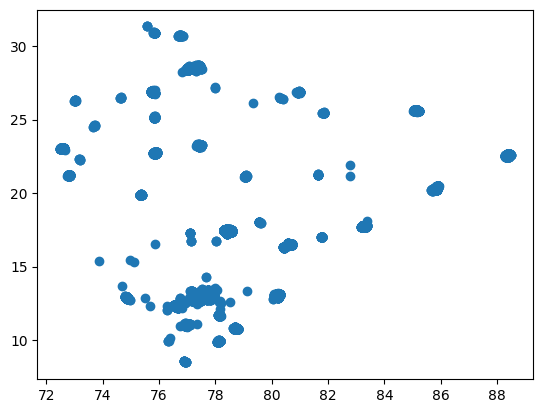

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=new_data['pick_lng'], y=new_data['pick_lat'])
plt.show()


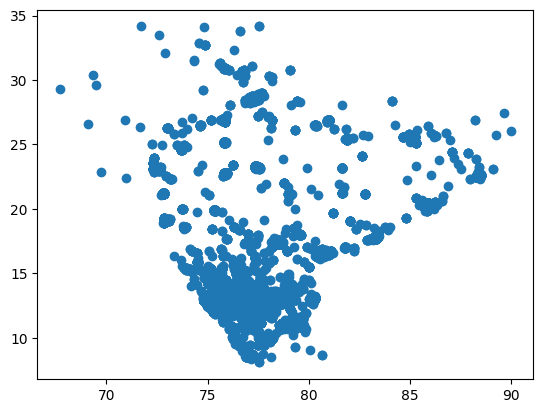

In [ ]:
plt.scatter(x=new_data['drop_lng'], y=new_data['drop_lat'])
plt.show()

In [ ]:
new_data.head(5)

,ts,pick_lat,pick_lng,drop_lat,drop_lng,hour,minute,year,month,day,distance,ride_minutes
0,2018-04-07 07:07:17,12.313621,76.658195,12.287301,76.602280,07,07,2018,04,07,6.7,11.0
1,2018-04-07 07:32:27,12.943947,77.560745,12.954014,77.543770,07,32,2018,04,07,2.2,4.0
2,2018-04-07 07:36:44,12.899603,77.587300,12.934780,77.569950,07,36,2018,04,07,4.3,7.0
3,2018-04-07 07:38:00,12.918229,77.607544,12.968971,77.636375,07,38,2018,04,07,6.5,11.0
4,2018-04-07 07:39:29,12.899490,77.587270,12.934780,77.569950,07,39,2018,04,07,4.4,8.0


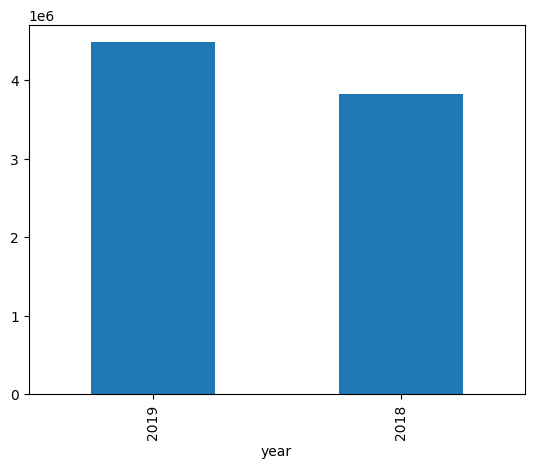

In [ ]:
new_data.year.value_counts().plot(kind='bar').get_figure()
plt.show()

In [ ]:
new_data.head(5)

,ts,pick_lat,pick_lng,drop_lat,drop_lng,hour,minute,year,month,day,distance,ride_minutes
0,2018-04-07 07:07:17,12.313621,76.658195,12.287301,76.602280,07,07,2018,04,07,6.7,11.0
1,2018-04-07 07:32:27,12.943947,77.560745,12.954014,77.543770,07,32,2018,04,07,2.2,4.0
2,2018-04-07 07:36:44,12.899603,77.587300,12.934780,77.569950,07,36,2018,04,07,4.3,7.0
3,2018-04-07 07:38:00,12.918229,77.607544,12.968971,77.636375,07,38,2018,04,07,6.5,11.0
4,2018-04-07 07:39:29,12.899490,77.587270,12.934780,77.569950,07,39,2018,04,07,4.4,8.0


In [ ]:
new_data["year"] = pd.to_datetime(new_data["ts"]).dt.year
new_data["month"] = pd.to_datetime(new_data["ts"]).dt.month
new_data["day"] = pd.to_datetime(new_data["ts"]).dt.day
new_data["hour"] = pd.to_datetime(new_data["ts"]).dt.hour

# Consider including other features like minute, weekday, etc.

features = new_data.drop(["ts"], axis=1)  # Drop the original datetime column


In [ ]:
# Assuming 'new_data' is your DataFrame with the extracted features

# Drop the 'ts' column from features
features = new_data.drop(["ts", 'ride_minutes'], axis=1)
target = new_data['ride_minutes']



In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [ ]:
# Initialize your model
model = RandomForestClassifier()

In [ ]:
# Fit the model
model.fit(X_train, y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))